# **Trabalhando com Arquivos Excel no Pandas**

## **Comandos Iniciais**

In [ ]:
# Importando a biblioteca Pandas
import pandas as pd

In [ ]:
# Leitura dos Arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
# Agrupar as planilhas (concatenar)
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Exibir amostra dos dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
97,Natal,2019-01-02,39.91,1037,3
182,Natal,2019-01-02,6.60,1037,2
101,Natal,2019-01-02,32.28,1035,3
6,Recife,2019-01-01,16.27,981,6
39,Fortaleza,2019-01-01,176.51,1005,1


In [ ]:
# Exibir os tipos de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterar o tipo de dado
#LojaID apesar de ser um número é apenas uma referência e não será utilizado para cálculo
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## **Valores Nulos**

In [ ]:
# Consultando linhas com valores faltantes
# Comando se for nulo, faça a soma
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
# substituindo os valores nulos por zero (0)
df["Vendas"].fillna(0, inplace=True)

In [ ]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Apagando as linhas com valores nulos em apenas uma coluna específica
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Apagando as linhas com valores nulos em todas as colunas
df.dropna(how="all", inplace=True)

## **Análise de Receita**

In [ ]:
# Criando uma nova coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Se eu quiser descobrir a quantidade de itens vendidos:
df["Qtd"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# consultando o valor máximo da receita
df["Receita"].max()

3544.0

In [ ]:
# consultando o valor máximo da receita
df["Receita"].min()

3.34

In [ ]:
# Como descobrir qual loja fez a maior receita? 
# Método nLargest: retorna a quantidade X com maiores valores de coluna Y -> df.nlargesr(X, "Y")
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# Como descobrir qual loja fez a menor receita? 
# Método nSmallest: retorna a quantidade X com menores valores de coluna Y -> df.nlargesr(X, "Y")
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# Agrupamento da receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjuto de dados
# Comando: exiba as 10 primeiras linhas com base nos maiores valores de receita do maior para o menor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com Datas**

In [ ]:
# Transformando a coluna de data em inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# Verificando a alteração do tipo de dado
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
Qtd        float64
dtype: object

In [ ]:
#Transformar a coluna Data para o formato datetime
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Qtd               float64
dtype: object

In [ ]:
# Agrupamento da Receita por Ano
# Comando: Para cada ano, faça o agrupamento e execute a soma da receita
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando nova coluna com o ano de venda
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd,Ano_Venda
76,Natal,2019-02-20,364.00,853,2,728.00,2.0,2019
215,Natal,2019-01-02,203.84,1036,1,203.84,1.0,2019
138,Fortaleza,2019-03-02,150.38,983,6,902.28,6.0,2019
51,Salvador,2019-01-01,13.37,1037,2,26.74,2.0,2019
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,2019


In [ ]:
# Extraindo o mês e o dia da venda
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd,Ano_Venda,Mes_Venda,Dia_Venda
41,Salvador,2019-02-13,9.86,1035,2,19.72,2.0,2019,2,13
76,Natal,2019-02-20,364.00,853,2,728.00,2.0,2019,2,20
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2
80,Natal,2018-05-23,264.00,852,3,792.00,3.0,2018,5,23
172,Natal,2019-01-02,6.70,1035,1,6.70,1.0,2019,1,2


In [ ]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Retornando a data mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [ ]:
# Calculando a diferença de dias
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
129,Natal,2019-01-02,125.66,1037,1,125.66,1.0,2019,1,2,366 days
150,Salvador,2019-01-02,11.13,1035,2,22.26,2.0,2019,1,2,366 days
83,Recife,2019-01-01,143.61,983,6,861.66,6.0,2019,1,1,365 days
17,Recife,2019-02-14,142.45,981,3,427.35,3.0,2019,2,14,409 days
126,Fortaleza,2019-03-02,41.87,980,8,334.96,8.0,2019,3,2,425 days


In [ ]:
# Criando a coluna de trimestre
df["Trimestre"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019,1,1,365 days,1
20,Natal,2018-06-08,608.00,852,4,2432.00,4.0,2018,6,8,158 days,2
105,Recife,2019-01-01,41.12,980,3,123.36,3.0,2019,1,1,365 days,1
18,Aracaju,2018-01-01,32.14,1522,6,192.84,6.0,2018,1,1,0 days,1
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019,1,12,376 days,1


In [ ]:
# Como fazer para filtrar as vendas de determinado ano e determinado mês (Função Loc)
# Exemplo: vendas de março de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Qtd,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2.0,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2,425 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,4.0,2019,3,24,447 days,1
112,Salvador,2019-03-02,43.00,1036,3,129.00,3.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2,425 days,1


## **Visualização de Dados**

### Utilizando a Biblioteca Matplotlib para Criação de Gráficos:

A biblioteca Pandas é totalmente integrada com a biblioteca Matplotlib. Dessa forma, permite com poucas linhas de código plotar gráficos para representar os dados. 

**Links Utéis:**

[Guia de Referência de Estilos](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

[Guia de Referência de Cores](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)

In [ ]:
# Método value_counts 
# Obs.: o ascending=False é adicionado para que o valor seja exibido do maior para o menor
# Nesse caso, mostra quantas linhas (qtd de vendas) existem para cada LojaID

df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

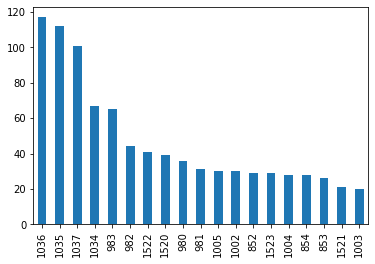

In [ ]:
# Criando um gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

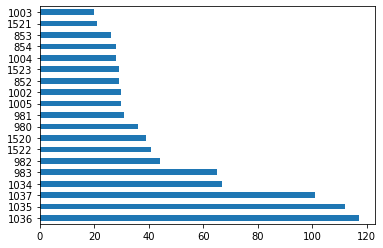

In [ ]:
# Criando um gráfico de barras horizontais do menor para o maior
df["LojaID"].value_counts(ascending=False).plot.barh()

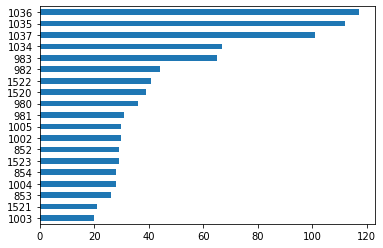

In [ ]:
# Criando um gráfico de barras horizontais do maior para o menor
# Para retirar a linha de caracteres acima do gráfico, basta incluir um ponto e vírgula (;) no final
df["LojaID"].value_counts(ascending=True).plot.barh();

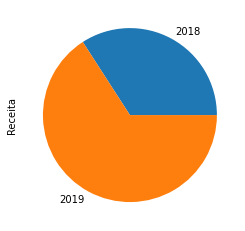

In [ ]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

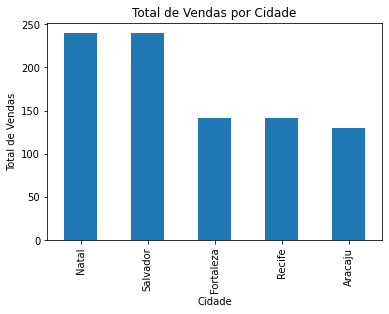

In [ ]:
# Adicionando título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

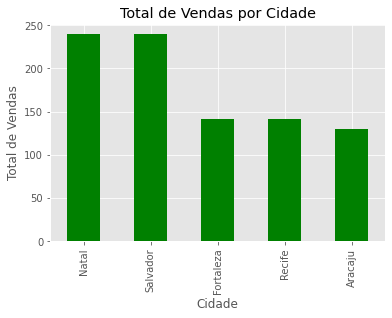

In [ ]:
# Alterando a cor do gráfico
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [ ]:
# Alterando o estilo 
plt.style.use("ggplot")

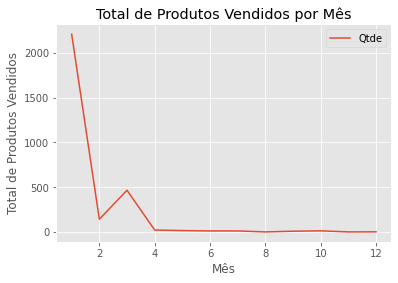

In [ ]:
# Gráfico de linhas com legenda
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [ ]:
# Quantidade de produtos vendidos por mês
# Nesse caso, considera tanto o ano de 2018 quanto de 2019
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Separando apenas as vendas por mês de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

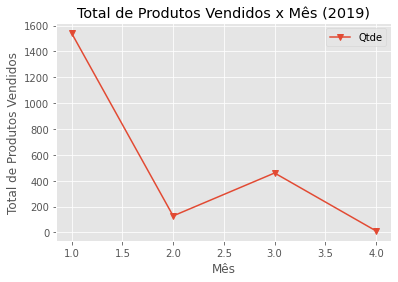

In [ ]:
# Gráfico da qtd de produtos vendidos por mês no ano de 2019
# o marker define o tipo de marcação da linha em cada mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos x Mês (2019)", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

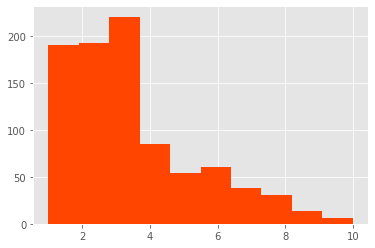

In [ ]:
# Histograma
plt.hist(df["Qtde"], color = "orangered");

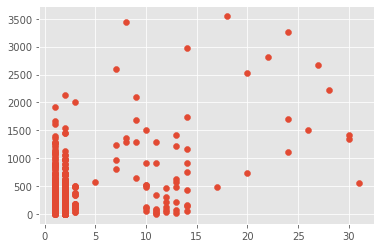

In [ ]:
# Gráfico de Dispersão
plt.scatter(x = df_2019["Dia_Venda"], y=df_2019["Receita"]);

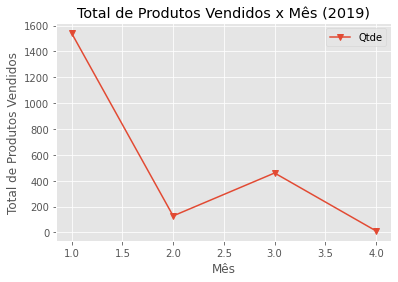

In [ ]:
# Salvando os gráficos em formato png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos x Mês (2019)", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();
plt.savefig("Gráfico QTDE x MES.png")